<a href="https://colab.research.google.com/github/fita004/Logistic-Regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [66]:
#load dataset
dataFrame = pd.read_csv("Iris.csv")
dataFrame.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
#check the data if there's a NaN value
dataFrame.isna ().values.any ()

False

In [68]:
#check the features
print (dataFrame.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


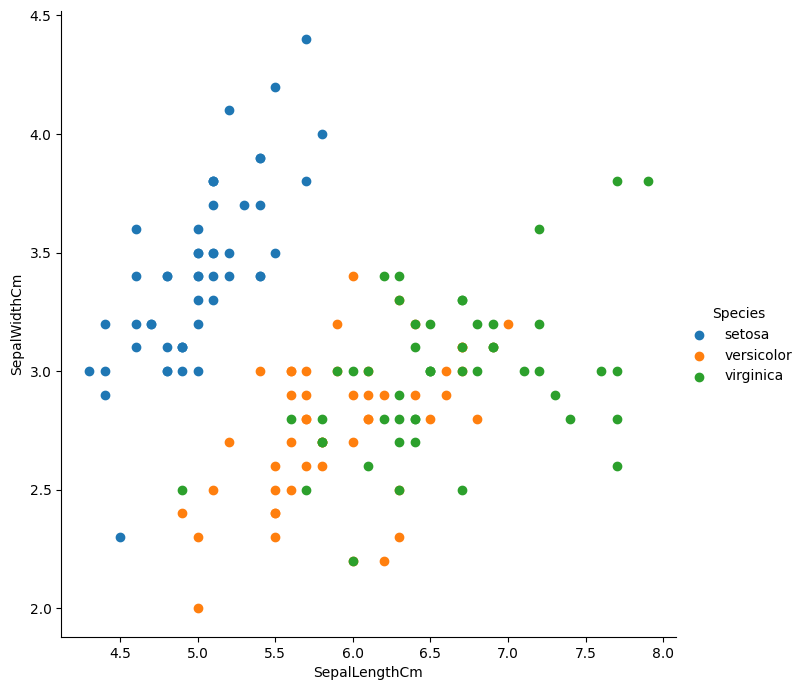

In [69]:
g = sns.FacetGrid (dataFrame, hue="Species", height=7) 
g.map (plt.scatter, "SepalLengthCm", "SepalWidthCm")   
g.add_legend()

In [70]:
#prepare the training set
X = dataFrame.iloc[:, :-1]
y = dataFrame.iloc[:, -1]

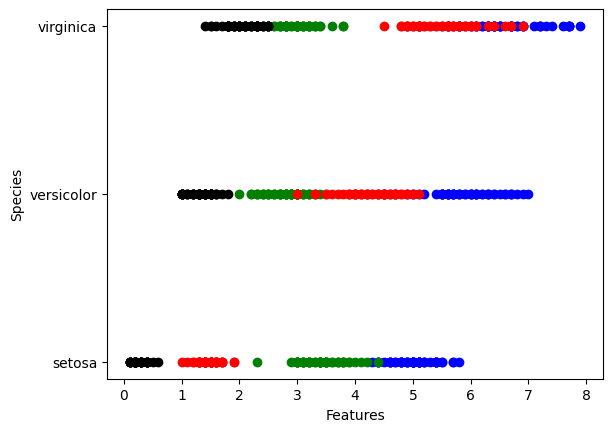

In [86]:
#plot the relation of each features to the target
plt.xlabel ("Features")
plt.ylabel ("Species")

pltX = dataFrame.loc[:, "SepalLengthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter (pltX, pltY, color="blue", label="SepalLengthCm")

pltX = dataFrame.loc[:, "SepalWidthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter (pltX, pltY, color="green", label="SepalWidthCm")

pltX = dataFrame .loc[:, "PetalLengthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter (pltX, pltY, color="red", label="PetalLengthCm")

pltX = dataFrame.loc[:, "PetalWidthCm"]
pltY = dataFrame.loc[:, "Species"]
plt.scatter (pltX, pltY, color="black", label="PetalWidthCm")

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#train the model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print (y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'virginica'
 'setosa' 'setosa']


In [88]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

Text(0.5, 427.9555555555555, 'Predicted label')

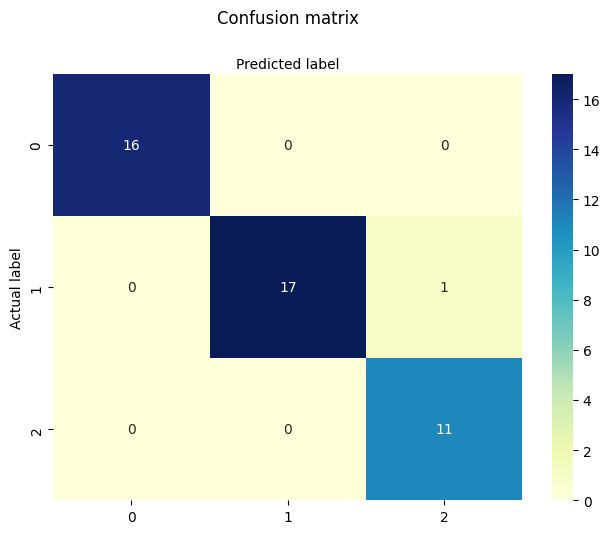

In [90]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots ()
tick_marks = np.arange (len(class_names))
plt.xticks (tick_marks, class_names)
plt.yticks (tick_marks, class_names)

# create heatmap
sns.heatmap (pd.DataFrame (cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position ("top")
plt.tight_layout ()
plt.title ('Confusion matrix', y=1.1)
plt.ylabel ('Actual label')
plt.xlabel ('Predicted label')

In [94]:
#check precision, recall, f1-score
predictions = y_test
print (classification_report (y_test, predictions))
print ("accuracy: ", accuracy_score (y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

accuracy:  1.0
